In [17]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import plotly.express as px
from pandas._libs.lib import tuples_to_object_array
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

# part 1

In [3]:
df=pd.read_csv('MCSDatasetNEXTCONLab.csv');

In [4]:
df.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [6]:
train_data = df[df['Day'].isin([0, 1, 2])]
test_data = df[df['Day'] == 3]

In [7]:
train_data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [8]:
test_data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
16,6,45.410236,-75.208755,3,22,25,30,30,10,32,0,75088,1
17,6,45.409787,-75.208022,3,22,35,30,20,10,32,0,75088,1
18,6,45.409407,-75.207825,3,22,45,30,10,10,32,0,65704,1
26,10,45.544018,-75.146364,3,20,39,20,20,2,82,0,300312,1
27,10,45.544576,-75.146364,3,20,49,20,10,2,82,0,300312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14429,3984,45.541816,-75.177356,3,4,36,60,10,9,43,0,300308,1
14445,3990,45.461207,-75.209171,3,3,4,40,40,4,60,0,159544,1
14446,3990,45.461241,-75.209067,3,3,14,40,30,4,60,0,159544,1
14447,3990,45.461261,-75.209205,3,3,24,40,20,4,60,0,159544,1


In [9]:
# Draw TSNE Funnction


def dispaly_TSNE(data_tsne_after_fit,y_for_color,title):
  fig = px.scatter(x=data_tsne_after_fit[:, 0], y=data_tsne_after_fit[:, 1], color=y_for_color)
  fig.update_layout(
      title=title,
      xaxis_title="First t-SNE",
      yaxis_title="Second t-SNE",
      width=800, height=600
  )
  fig.show()

## A

In [10]:
x_train=train_data.drop(["ID",'Day','Ligitimacy'],axis=1)
y_train=train_data['Ligitimacy']
x_test=test_data.drop(["ID",'Day','Ligitimacy'],axis=1)
y_test=test_data['Ligitimacy']

## B

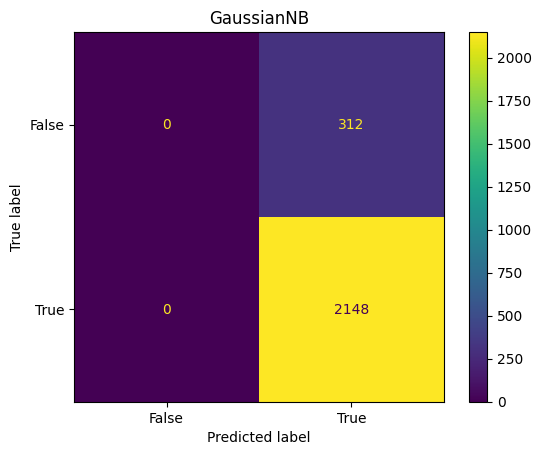

F1 Score:  0.9322916666666667


In [39]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
GNB_pred=GNB.predict(x_test)
GNB_Confusion_matrix=metrics.confusion_matrix(y_test,GNB_pred)
GNB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GNB_Confusion_matrix, display_labels = [False, True])
GNB_cm_display.plot()
plt.title("GaussianNB")
plt.show()

GNB_f1_score=f1_score(y_test,GNB_pred)
print("F1 Score: ",GNB_f1_score)

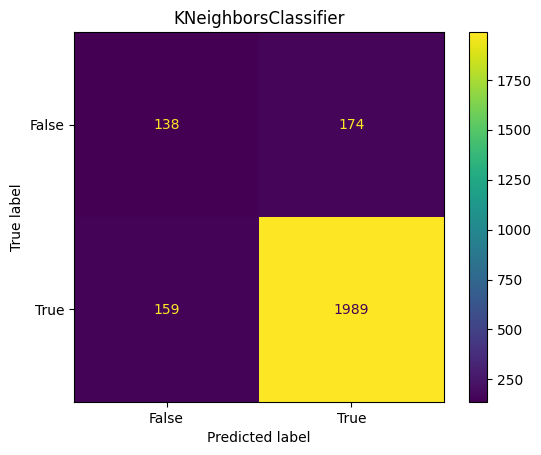

F1 Score:  0.9227557411273487


In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
KNN_pred=KNN.predict(x_test)
KNN_Confusion_matrix=metrics.confusion_matrix(y_test,KNN_pred)
KNN_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = KNN_Confusion_matrix, display_labels = [False, True])
KNN_cm_display.plot()
plt.title("KNeighborsClassifier")
plt.show()
KNN_f1_score=f1_score(y_test,KNN_pred)
print("F1 Score: ",KNN_f1_score)

## C

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_train = tsne.fit_transform(x_train)
dispaly_TSNE(data_tsne_after_fit=tsne_train,y_for_color=y_train,title="TSNE Training Set Plot")

In [ ]:
# plt.scatter(tsne_train[:, 0], tsne_train[:, 1], c=y_train, cmap="viridis", alpha=0.7)
# plt.colorbar()
# # plt.title("Training Set t-SNE Plot")
# plt.show()

In [ ]:
tsne_test = tsne.fit_transform(x_test)
dispaly_TSNE(data_tsne_after_fit=tsne_test,y_for_color=y_test,title="TSNE Test Set Plot")
# plt.scatter(tsne_test[:, 0], tsne_test[:, 1], c=y_test, cmap="viridis", alpha=0.7)
# plt.colorbar()
# plt.title("Test Set t-SNE Plot")
# plt.show()

In [ ]:
print('Shape of the Training Data befor T-SNE:', x_train.shape)
print('Shape of the Training Data after T-SNE:', tsne_train.shape)
print('Shape of the Testing Data befor T-SNE:', x_test.shape)
print('Shape of the Testing Data after T-SNE:', tsne_test.shape)


Shape of the Training Data befor T-SNE: (7255, 10)
Shape of the Training Data after T-SNE: (7255, 2)
Shape of the Testing Data befor T-SNE: (2460, 10)
Shape of the Testing Data after T-SNE: (2460, 2)


##**Part2**

## A

In [ ]:


# Define the range of dimensions/components for PCA and AE
dimensions = list(range(2, 11))

# Initialize lists to store F1 scores for each dimensionality reduction method
pca_f1_scores_nb = []
pca_f1_scores_knn = []
# Perform dimensionality reduction using PCA and AE for different dimensions
for n in dimensions:
    # PCA
    pca = PCA(n_components=n, random_state=0)
    pca_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', pca),
    ])
    X_train_pca = pca_pipeline.fit_transform(x_train)
    X_test_pca = pca_pipeline.transform(x_test)

    # Apply classifiers on the reduced data (after pca)
    GNB.fit(X_train_pca, y_train)
    GNB_pred_pca = GNB.predict(X_test_pca)
    GNB_f1_score_pca = f1_score(y_test, GNB_pred_pca)
    pca_f1_scores_nb.append(GNB_f1_score_pca)

    KNN.fit(X_train_pca, y_train)
    KNN_pred_pca = KNN.predict(X_test_pca)
    KNN_f1_score_pca = f1_score(y_test, KNN_pred_pca)
    pca_f1_scores_knn.append(KNN_f1_score_pca)






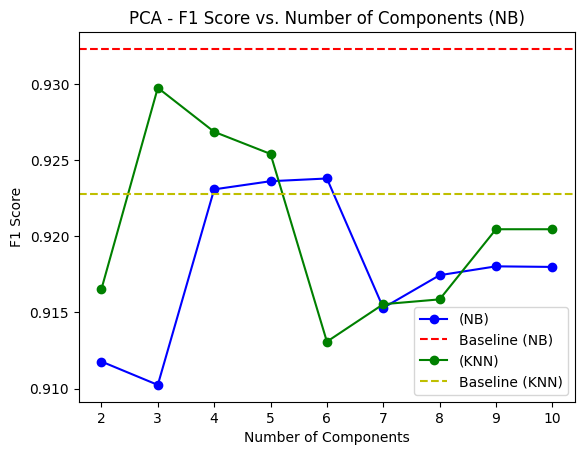

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 2, 1)
plt.plot(dimensions, pca_f1_scores_nb , marker='o', linestyle='-', color='b',label='(NB)')
plt.axhline(GNB_f1_score, linestyle='--', color='r', label='Baseline (NB)')
plt.plot(dimensions, pca_f1_scores_knn, marker='o', linestyle='-', color='g',label='(KNN)')
plt.axhline(KNN_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('PCA - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
# plt.subplot(2, 2, 2)

# plt.title('PCA - F1 Score vs. Number of Components (KNN)')
# plt.xlabel('Number of Components')
# plt.ylabel('F1 Score')
# plt.legend()

In [ ]:
range(x_train.shape[1], 1, -1)

range(10, 1, -1)

In [ ]:
ae_f1_scores_nb = []
ae_f1_scores_knn = []
#dimension = list(range(x_train.shape[1], 1, -1))
dimension = list(range(2,11))
scaler= MinMaxScaler()
# X_train = scaler.fit_transform(x_train,y_train)
# X_test = scaler.transform(x_test)
X_train=x_train
X_test=x_test

for n in dimension:

    # AE

    autoencoder = MLPRegressor(hidden_layer_sizes=[n], activation='relu', solver='adam',random_state=0)
    autoencoder.fit(X_train, X_train)

    # Reduce dimensionality with the trained autoencoder

    X_train_ae = autoencoder.predict(X_train)
    X_test_ae = autoencoder.predict(X_test)
    # Applying  the  classifiers on the reduced data (after ae)
    GNB.fit(X_train_ae, y_train)
    GNB_pred_ae = GNB.predict(X_test_ae)
    GNB_f1_score_ae = f1_score(y_test, GNB_pred_ae)
    ae_f1_scores_nb.append(GNB_f1_score_ae)

    KNN.fit(X_train_ae, y_train)
    KNN_pred_ae = KNN.predict(X_test_ae)
    KNN_f1_score_ae = f1_score(y_test, KNN_pred_ae)
    ae_f1_scores_knn.append(KNN_f1_score_ae)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

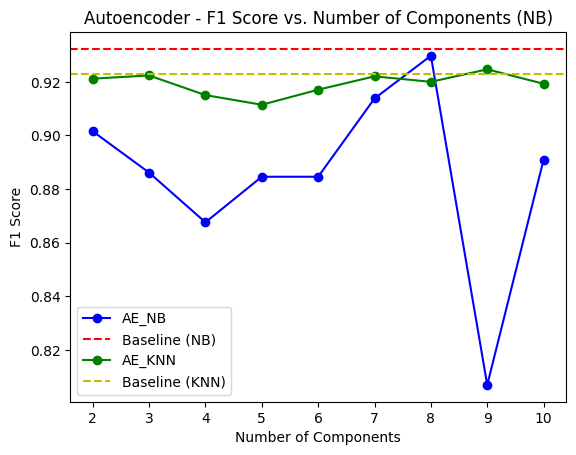

In [ ]:

plt.plot( dimension,ae_f1_scores_nb, marker='o', linestyle='-', color='b', label='AE_NB')
plt.axhline(GNB_f1_score, linestyle='--', color='r', label='Baseline (NB)')

plt.plot( dimension,ae_f1_scores_knn, marker='o', linestyle='-', color='g', label='AE_KNN')
plt.axhline(KNN_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('Autoencoder - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# plt.title('Autoencoder - F1 Score vs. Number of Components (KNN)')
# plt.xlabel('Number of Components')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
##########################################3

In [ ]:
# Find the index of the best F1 score for PCA
best_pca_index_nb = pca_f1_scores_nb.index(max(pca_f1_scores_nb))
best_pca_index_knn = pca_f1_scores_knn.index(max(pca_f1_scores_knn))

# Find the index of the best F1 score for AE
best_ae_index_nb = ae_f1_scores_nb.index(max(ae_f1_scores_nb))
best_ae_index_knn = ae_f1_scores_knn.index(max(ae_f1_scores_knn))

In [ ]:
# Get the best dimensions for PCA
best_pca_dimension_nb = dimensions[best_pca_index_nb]
best_pca_dimension_knn = dimensions[best_pca_index_knn]

# Get the best dimensions for AE
best_ae_dimension_nb = dimensions[best_ae_index_nb]
best_ae_dimension_knn = dimensions[best_ae_index_knn]

In [ ]:
# Perform dimensionality reduction using PCA and AE with the best dimensions
best_pca_nb = PCA(n_components=best_pca_dimension_nb, random_state=0)
best_pca_knn = PCA(n_components=best_pca_dimension_knn, random_state=0)


best_pca_pipeline_nb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', best_pca_nb),
])

best_pca_pipeline_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', best_pca_knn),
])
X_train_best_pca_nb = best_pca_pipeline_nb.fit_transform(x_train)
X_test_best_pca_nb = best_pca_pipeline_nb.transform(x_test)

X_train_best_pca_knn = best_pca_pipeline_knn.fit_transform(x_train)
X_test_best_pca_knn = best_pca_pipeline_knn.transform(x_test)



## B

In [ ]:
from sklearn.manifold import TSNE

# Generate TSNE plots for the best performance in the previous part in PCA
tsne_train_best_pca_nb = TSNE(n_components=2, random_state=0).fit_transform(X_train_best_pca_nb)
tsne_test_best_pca_nb = TSNE(n_components=2, random_state=0).fit_transform(X_test_best_pca_nb)
tsne_train_best_pca_knn = TSNE(n_components=2, random_state=0).fit_transform(X_train_best_pca_knn)
tsne_test_best_pca_knn = TSNE(n_components=2, random_state=0).fit_transform(X_test_best_pca_knn)


In [ ]:
# Plot the TSNE plots
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# plt.scatter(tsne_train_best_pca_nb[:, 0], tsne_train_best_pca_nb[:, 1], c=y_train, cmap='viridis')
# plt.title('TSNE - Best PCA NB (Train)')
# plt.subplot(2, 2, 2)
# plt.scatter(tsne_test_best_pca_nb[:, 0], tsne_test_best_pca_nb[:, 1], c=y_test, cmap='viridis')
# plt.title('TSNE - Best PCA NB (Test)')
# plt.subplot(2, 2, 3)
# plt.scatter(tsne_train_best_pca_knn[:, 0], tsne_train_best_pca_knn[:, 1], c=y_train, cmap='viridis')
# plt.title('TSNE - Best PCA KNN (Train)')
# plt.subplot(2, 2, 4)
# plt.scatter(tsne_test_best_pca_knn[:, 0], tsne_test_best_pca_knn[:, 1], c=y_test, cmap='viridis')
# plt.title('TSNE - Best PCA KNN (Test)')
# plt.tight_layout()
# plt.show()


#### Plot the TSNE plots
######TSNE - Best PCA NB

dispaly_TSNE(data_tsne_after_fit=tsne_train_best_pca_nb,y_for_color=y_train,title="TSNE - Best PCA NB (Train)")
dispaly_TSNE(data_tsne_after_fit=tsne_test_best_pca_nb,y_for_color=y_test,title="TSNE - Best PCA NB (Test)")

######TSNE - Best PCA KNN

dispaly_TSNE(data_tsne_after_fit=tsne_train_best_pca_knn,y_for_color=y_train,title="TSNE - Best PCA KNN (Train)")
dispaly_TSNE(data_tsne_after_fit=tsne_test_best_pca_knn,y_for_color=y_test,title="TSNE - Best PCA KNN (Test)")





In [ ]:
#auto encoder

best_ae_nb = MLPRegressor(hidden_layer_sizes=[best_ae_dimension_nb], activation='relu', solver='adam',random_state=0)
best_ae_knn = MLPRegressor(hidden_layer_sizes=[best_ae_dimension_knn],activation='relu', solver='adam',random_state=0)

scaler= MinMaxScaler()
X_train = scaler.fit_transform(x_train,y_train)
X_test = scaler.transform(x_test)

# Reduce dimensionality with the trained autoencoder
best_ae_nb.fit(X_train,X_train)
X_train_best_ae_nb = best_ae_nb.predict(X_train)
X_test_best_ae_nb = best_ae_nb.predict(X_test)

# X_test_best_ae_nb = best_ae_pipeline_nb['ae'].predict(x_test)



# X_train_best_ae_knn = best_ae_pipeline_knn['ae'].fit(x_train,y_train)
# X_test_best_ae_knn = best_ae_pipeline_knn['ae'].predict(x_test)
best_ae_knn.fit(X_train,X_train)
X_train_best_ae_knn = best_ae_knn.predict(X_train)
X_test_best_ae_knn = best_ae_knn.predict(X_test)



In [ ]:
# Generate TSNE plots for the best performance in the previous part in AE
#X_test_best_ae_nb.reshape(-1, X_test_best_ae_nb.shape[1])
tsne_train_best_ae_nb = TSNE(n_components=2, random_state=0).fit_transform(X_train_best_ae_nb)
tsne_test_best_ae_nb = TSNE(n_components=2, random_state=0).fit_transform(X_test_best_ae_nb)
tsne_train_best_ae_knn = TSNE(n_components=2, random_state=0).fit_transform(X_train_best_ae_knn)
tsne_test_best_ae_knn = TSNE(n_components=2, random_state=0).fit_transform(X_test_best_ae_knn)


In [ ]:
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# plt.scatter(tsne_train_best_ae_nb[:, 0], tsne_train_best_ae_nb[:, 1], c=y_train, cmap='viridis')
# plt.title('TSNE - Best AE NB (Train)')
# plt.subplot(2, 2, 2)
# plt.scatter(tsne_test_best_ae_nb[:, 0], tsne_test_best_ae_nb[:, 1], c=y_test, cmap='viridis')
# plt.title('TSNE - Best AE NB (Test)')
# plt.subplot(2, 2, 3)
# plt.scatter(tsne_train_best_ae_knn[:, 0], tsne_train_best_ae_knn[:, 1], c=y_train, cmap='viridis')
# plt.title('TSNE - Best AE KNN (Train)')
# plt.subplot(2, 2, 4)
# plt.scatter(tsne_test_best_ae_knn[:, 0], tsne_test_best_ae_knn[:, 1], c=y_test,cmap='viridis')

##TSNE plot NB
dispaly_TSNE(data_tsne_after_fit=tsne_train_best_ae_nb,y_for_color=y_train,title="TSNE - Best AE NB (Train)")
dispaly_TSNE(data_tsne_after_fit=tsne_test_best_ae_nb,y_for_color=y_test,title="TSNE - Best AE NB (Test)")


##TSNE plot KNN
dispaly_TSNE(data_tsne_after_fit=tsne_train_best_ae_knn,y_for_color=y_train,title="TSNE - Best AE KNN (Train)")
dispaly_TSNE(data_tsne_after_fit=tsne_test_best_ae_knn,y_for_color=y_test,title="TSNE - Best AE KNN (Test)")

# part 3

## A

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test)
  model.fit(X_train_new, y_train)
  y_pred = model.predict(X_test_new)
  f1score = f1_score(y_test, y_pred)*100

  return f1score

In [ ]:
def display_selected_feature(X_train, y_train, X_test, y_test, FSM,title):
  fs = FSM
  fs.fit(X_train, y_train)
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test)

  tsne_traing = TSNE(n_components=2, random_state=0).fit_transform(X_train_new)
  dispaly_TSNE(data_tsne_after_fit=tsne_traing,y_for_color=y_train,title=title)

  tsne_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_new)
  dispaly_TSNE(data_tsne_after_fit=tsne_test,y_for_color=y_test,title=title)




In [ ]:
KNN_f1_score

0.9227557411273487

Maximum f1 score GB: 90.96470588235293
Best number of features GB: 6
Maximum f1 score KNN: 93.95565927654609
Best number of features KNN: 8


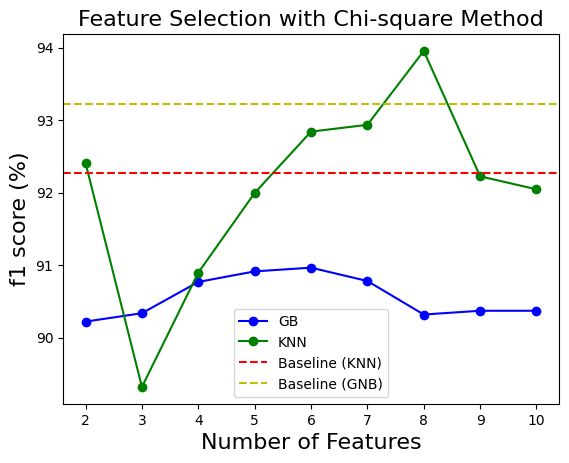

In [ ]:
GB = GaussianNB()
KNN=KNeighborsClassifier()

f1score_dict_GB = {}
f1score_dict_KNN = {}
for nf in range(2,11):
  fsm =  SelectKBest(chi2, k=nf)
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, GB)
  f1score_dict_GB[nf] = f1score
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, KNN)
  f1score_dict_KNN[nf] = f1score

plt.plot(*zip(*sorted(f1score_dict_GB.items())),marker='o', linestyle='-', color='b', label='GB')
plt.plot(*zip(*sorted(f1score_dict_KNN.items())),marker='o', linestyle='-', color='g', label='KNN')
plt.axhline(KNN_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.axhline(GNB_f1_score*100, linestyle='--', color='y', label='Baseline (GNB)')
Title = "Feature Selection with Chi-square Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1 score (%)", fontsize=16)
plt.legend()

print("Maximum f1 score GB:", max(f1score_dict_GB.values()))
print("Best number of features GB:", max(f1score_dict_GB, key=f1score_dict_GB.get))

print("Maximum f1 score KNN:", max(f1score_dict_KNN.values()))
print("Best number of features KNN:", max(f1score_dict_KNN, key=f1score_dict_KNN.get))

Maximum f1 score GB: 93.22916666666667
Best number of features GB: 2
Maximum f1 score KNN: 98.38369641602249
Best number of features KNN: 3


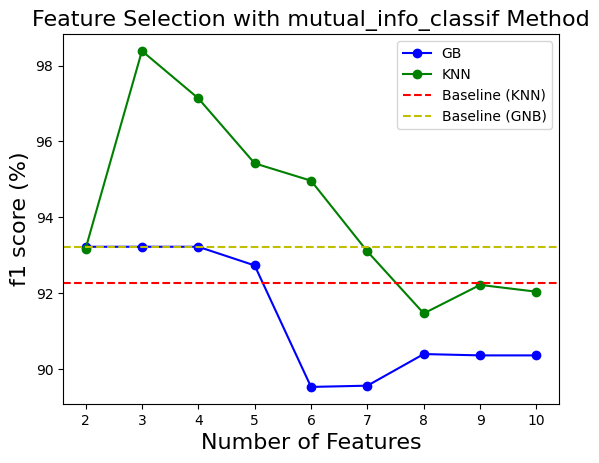

In [ ]:
GB = GaussianNB()
KNN=KNeighborsClassifier()

f1score_dict_GB = {}
f1score_dict_KNN = {}
for nf in range(2,11):
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, GB)
  f1score_dict_GB[nf] = f1score
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, KNN)
  f1score_dict_KNN[nf] = f1score

plt.plot(*zip(*sorted(f1score_dict_GB.items())),marker='o', linestyle='-', color='b', label='GB')
plt.plot(*zip(*sorted(f1score_dict_KNN.items())),marker='o', linestyle='-', color='g', label='KNN')
plt.axhline(KNN_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.axhline(GNB_f1_score*100, linestyle='--', color='y', label='Baseline (GNB)')
Title = "Feature Selection with mutual_info_classif Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1 score (%)", fontsize=16)
plt.legend()

print("Maximum f1 score GB:", max(f1score_dict_GB.values()))
print("Best number of features GB:", max(f1score_dict_GB, key=f1score_dict_GB.get))

print("Maximum f1 score KNN:", max(f1score_dict_KNN.values()))
print("Best number of features KNN:", max(f1score_dict_KNN, key=f1score_dict_KNN.get))

## B

Maximum f1 score GB: 93.22916666666667
Best number of features GB: 2
Maximum f1 score KNN: 98.38369641602249
Best number of features KNN: 3


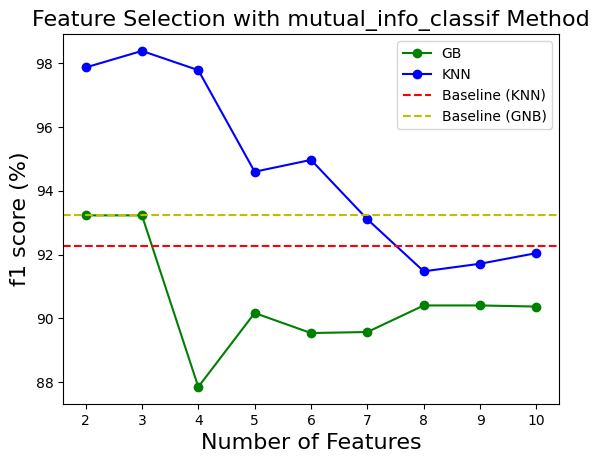

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)


GB = GaussianNB()
KNN=KNeighborsClassifier()

f1score_dict_GB = {}
f1score_dict_KNN = {}
for nf in range(2,11):
  fsm =  RFE(estimator=DecisionTreeClassifier(), n_features_to_select=nf)
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, GB)
  f1score_dict_GB[nf] = f1score
  f1score = select_feature(X_train, y_train, X_test, y_test, fsm, KNN)
  f1score_dict_KNN[nf] = f1score

plt.plot(*zip(*sorted(f1score_dict_GB.items())),marker='o', linestyle='-', color='g', label='GB')
plt.plot(*zip(*sorted(f1score_dict_KNN.items())),marker='o', linestyle='-', color='b', label='KNN')
Title = "Feature Selection with mutual_info_classif Method"  ################################
plt.title(Title, fontsize=16)
plt.axhline(KNN_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.axhline(GNB_f1_score*100, linestyle='--', color='y', label='Baseline (GNB)')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1 score (%)", fontsize=16)
plt.legend()

print("Maximum f1 score GB:", max(f1score_dict_GB.values()))
print("Best number of features GB:", max(f1score_dict_GB, key=f1score_dict_GB.get))

print("Maximum f1 score KNN:", max(f1score_dict_KNN.values()))
print("Best number of features KNN:", max(f1score_dict_KNN, key=f1score_dict_KNN.get))

## C

In [ ]:
fsm =  RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
display_selected_feature(X_train, y_train, X_test, y_test,fsm,"TSNE best wrapper")

## part 4

In [ ]:

train_data=pd.DataFrame(train_data)
train_data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [27]:
train_data_x=train_data.drop(["ID",'Day'],axis=1)
x_train=train_data.drop(["ID",'Day','Ligitimacy','Hour','Minute','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber','Duration'],axis=1)

y_train=train_data['Ligitimacy']
x_test=test_data.drop(["ID",'Day','Ligitimacy','Hour','Minute','RemainingTime','Resources','Coverage','OnPeakHours','GridNumber','Duration'],axis=1)
x_test_x=test_data.drop(["ID",'Day'],axis=1)

y_test=test_data['Ligitimacy']

In [29]:
def calculter(model_after_fit,x_test,data_test):
   culter={}
   for index, row in x_test.iterrows():
      # print(row['Longitude'])
      # print(row['Latitude'])
      #print(np.array(row).reshape(1, -1))
      elemat=pd.DataFrame(np.array(row).reshape(1, -1),columns=['Latitude','Longitude'])
      number_culster=model_after_fit.predict(elemat)
      #number_culster=model_after_fit.fit_predict(elemat)
      #print(number_culster)
      Ligitimacy=((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"]).astype(int)
      # print((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"])
      # print(row)
      number_culster=int(number_culster)
      try:

       x=int(Ligitimacy)

      except:
         #print(list(Ligitimacy))
         x=list(Ligitimacy)[0]


      try:
        cout=culter[number_culster]
        if(x==1 and cout!=-1):

          culter[number_culster]=cout+1
        else:
          culter[number_culster]=-1
      except:
        #for intiztion culster in dict
       culter[number_culster]=x
   return culter




,Latitude,Longitude
16,45.410236,-75.208755
17,45.409787,-75.208022
18,45.409407,-75.207825
26,45.544018,-75.146364
27,45.544576,-75.146364
...,...,...
14429,45.541816,-75.177356
14445,45.461207,-75.209171
14446,45.461241,-75.209067
14447,45.461261,-75.209205


In [30]:
def culterdict(dim,data_dict):
  cout=0
  for i in range(dim):
    if(data_dict[i]!=-1):
      cout=cout+data_dict[i]
  return cout

## A

In [31]:
from numpy.core.multiarray import result_type
from sklearn.cluster import KMeans
import numpy as np
result={}
for i  in [8,12,16,20,32]:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(x_train)
    #print("centroid",kmeans.cluster_centers_)
    x=calculter(kmeans,x_train,train_data)
    #print(x)
    score=culterdict(i,x)
    result[i]=score





In [ ]:
result

dict_items([(8, 1520), (12, 2717), (16, 3291), (20, 4158), (32, 4744)])


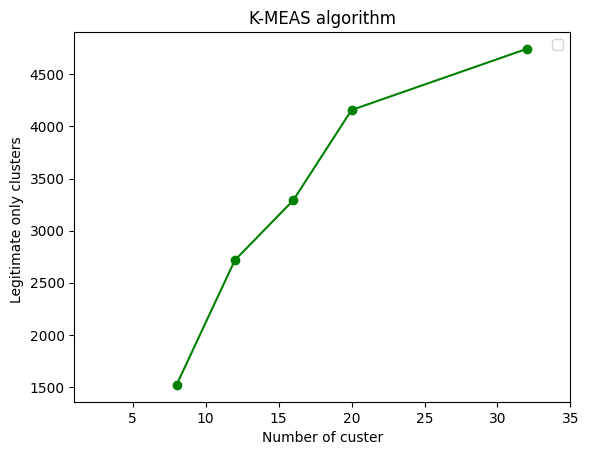

In [32]:
myList = result.items()
print(myList)
myList = sorted(myList)
x, y = zip(*myList)
plt.xlabel('Number of custer')
plt.ylabel('Legitimate only clusters ')
plt.title("K-MEAS algorithm")
plt.plot(x, y,marker='o', linestyle='-', color='g')
plt.xlim([1, 35])
plt.legend()
plt.show()

## B

In [83]:
!pip install minisom
!pip install sklearn-som

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=1b30b268db151c64f91f418da6aacd9ff7fc9ba4c6125d8f41f3c0ba6de4e968
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [85]:
from sklearn_som.som import SOM
result={}
data_test=train_data
for i  in [8,12,16,20,32]:
    sofm=SOM(m=int(i/2), n=2, dim=2,random_state=0)
    sofm.fit(np.array(x_train))
    #print("centroid",kmeans.cluster_centers_)
    # x=sofm.predict(np.array(x_train))
    # print(x)
    culter={}

    for index, row in x_train.iterrows():
        #elemat=pd.DataFrame(np.array(row).reshape(1, -1),columns=['Latitude','Longitude'])
        number_culster=sofm.predict(np.array(row).reshape(1, -1))
        #number_culster=model_after_fit.fit_predict(elemat)
        Ligitimacy=((data_test.loc[(data_test['Longitude'] == row[1]	) & (data_test['Latitude'] == row[0])])["Ligitimacy"]).astype(int)
        # print((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"])
        # print(row)
        number_culster=int(number_culster)
        try:
         x=int(Ligitimacy)
        except:
          #print(list(Ligitimacy))
          x=list(Ligitimacy)[0]
        try:
          cout=culter[number_culster]
          if(x==1 and cout!=-1):
            culter[number_culster]=cout+1
          else:
            culter[number_culster]=-1
        except:
          #for intiztion culster in dict
         culter[number_culster]=x
    cout=0
    # print(culter)
    # print(len(culter))
    for K in culter.keys():
      if(culter[K]!=-1):
        cout=cout+culter[K]

    result[i]=cout


dict_items([(8, 1089), (12, 1865), (16, 3200), (20, 3378), (32, 3679)])


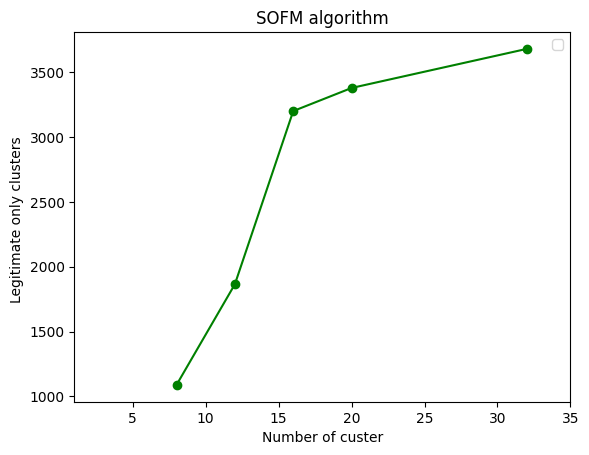

In [133]:
myList = result.items()
print(myList)
myList = sorted(myList)
x, y = zip(*myList)
plt.xlabel('Number of custer')
plt.ylabel('Legitimate only clusters ')
plt.title("SOFM algorithm")
plt.plot(x, y,marker='o', linestyle='-', color='g')
plt.xlim([1, 35])
plt.legend()
plt.show()

## C

In [52]:
def calculter_DBSCAN(model_after_fit,x_test,data_test):
   culter={}
   for index, row in x_test.iterrows():
      # print(row['Longitude'])
      # print(row['Latitude'])
      #print(np.array(row).reshape(1, -1))
      elemat=pd.DataFrame(np.array(row).reshape(1, -1),columns=['Latitude','Longitude'])
      #number_culster=model_after_fit.predict(elemat)
      number_culster=model_after_fit.fit_predict(elemat)
      #print(number_culster)
      Ligitimacy=((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"]).astype(int)
      # print((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"])
      # print(row)
      number_culster=int(number_culster)
      try:

       x=int(Ligitimacy)

      except:
         #print(list(Ligitimacy))
         x=list(Ligitimacy)[0]


      try:
        cout=culter[number_culster]
        if(x==1 and cout!=-1):

          culter[number_culster]=cout+1
        else:
          culter[number_culster]=-1
      except:
        #for intiztion culster in dict
       culter[number_culster]=x
   return culter




In [65]:
def calculter_DBSCAN(culters_number,x_test,data_test):
   culter={}
   counter=0
   for index, row in x_test.iterrows():
      # print(row['Longitude'])
      # print(row['Latitude'])
      #print(np.array(row).reshape(1, -1))
      #elemat=pd.DataFrame(np.array(row).reshape(1, -1),columns=['Latitude','Longitude'])
      #number_culster=model_after_fit.predict(elemat)
      number_culster=culters_number[counter]
      counter=counter+1
      #print(number_culster)
      Ligitimacy=((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"]).astype(int)
      # print((data_test.loc[(data_test['Longitude'] == row['Longitude']	) & (data_test['Latitude'] == row['Latitude'])])["Ligitimacy"])
      # print(row)
      number_culster=int(number_culster)
      try:

       x=int(Ligitimacy)

      except:
         #print(list(Ligitimacy))
         x=list(Ligitimacy)[0]


      try:
        cout=culter[number_culster]
        if(x==1 and cout!=-1):

          culter[number_culster]=cout+1
        else:
          culter[number_culster]=-1
      except:
        #for intiztion culster in dict
       culter[number_culster]=x
   return culter


In [87]:
from sklearn.cluster import DBSCAN
result={}
minPts = 5
#[0.01, .0001, .5, .00310, .0020]
for index ,i  in enumerate([0.001, .005, .002, .0001, .00632]):
    #kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(x_train)
    clustering = DBSCAN(eps=i, min_samples=7)
    #clustering.fit(np.array(x_train))
    number_culster=clustering.fit_predict(x_train)
    print("centroid",clustering.labels_)
    culter=calculter_DBSCAN(number_culster,x_train,train_data)
    print(x)
    cout=0
    print(culter)
    print(len(culter))
    for K in culter.keys():
      if(culter[K]!=-1):
        cout=cout+culter[K]

    result[i]=cout

centroid [ 0  0  0 ... -1 -1 -1]
(8, 12, 16, 20, 32)
{0: 11, -1: -1, 92: 7, 1: 7, 2: -1, 3: -1, 4: 11, 86: 6, 5: -1, 127: 7, 6: -1, 7: 8, 106: 7, 8: 10, 9: 10, 10: -1, 11: -1, 12: 18, 116: 7, 13: -1, 14: 8, 19: -1, 15: 14, 16: -1, 81: 10, 17: 7, 18: -1, 20: 18, 21: 7, 22: 9, 23: 7, 24: 8, 25: 10, 26: 9, 27: 7, 31: 11, 28: 8, 29: 14, 87: 7, 30: 10, 126: 7, 107: 7, 129: 7, 32: 7, 33: 8, 94: 7, 34: 7, 35: 10, 36: 8, 37: 10, 38: 11, 39: 11, 108: 7, 40: 7, 41: 8, 42: 9, 43: 14, 67: 7, 44: 10, 45: 10, 46: 8, 95: 7, 47: 8, 48: 13, 49: 9, 50: 10, 51: 10, 52: 10, 53: 9, 54: 11, 55: 14, 56: 11, 57: 8, 58: 7, 69: 7, 59: 13, 60: 8, 61: 16, 80: 7, 62: 14, 63: 10, 64: 7, 65: 11, 66: 7, 68: 8, 70: 7, 71: 22, 72: 8, 73: 8, 122: 7, 124: 8, 74: 15, 75: 9, 125: 7, 101: 7, 88: 9, 76: 8, 77: 11, 78: 9, 79: -1, 82: 8, 83: 7, 104: 7, 84: 7, 85: 10, 89: 11, 90: 7, 91: 8, 93: 8, 96: 9, 97: 12, 98: 9, 103: 7, 99: 9, 100: 12, 102: 8, 111: 7, 105: 7, 109: 4, 110: 7, 112: 11, 113: 7, 114: 17, 115: 6, 117: 7, 118: 

In [88]:
result

{0.001: 1092, 0.005: 1884, 0.002: 6173, 0.0001: 0, 0.00632: 553}

dict_items([(0.001, 1092), (0.005, 1884), (0.002, 6173), (0.0001, 0), (0.00632, 553)])


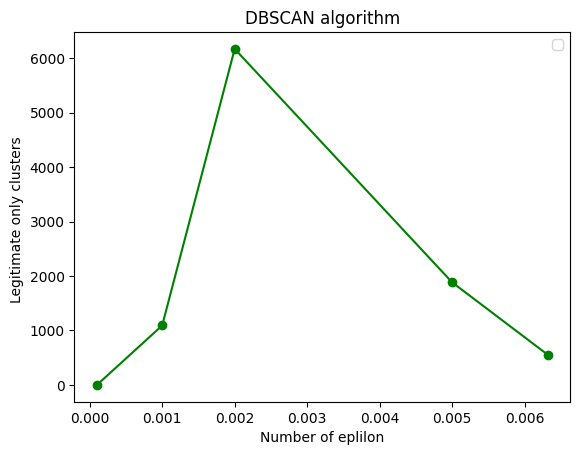

In [89]:
myList = result.items()
print(myList)
myList = sorted(myList)
x, y = zip(*myList)
plt.xlabel('Number of eplilon')
plt.ylabel('Legitimate only clusters ')
plt.title("DBSCAN algorithm")
plt.plot(x, y,marker='o', linestyle='-', color='g')
#plt.xlim(result.keys())
plt.legend()
plt.show()